In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

from models import VGG16
from utils import train, predict, plot_metrics, plot_confusion_matrix

In [2]:
train_ds = tfds.load('cifar10', split='train[:90%]', shuffle_files=True, as_supervised=True)
val_ds = tfds.load('cifar10', split='train[90%:]', shuffle_files=True, as_supervised=True)
test_ds = tfds.load('cifar10', split='test', as_supervised=True)

In [3]:
def format_image(image, label):
    image = tf.cast(image, tf.float32)
    image = image / 255.0
    return  image, label

In [4]:
batch_size = 16

train_ds = train_ds.map(format_image).shuffle(buffer_size=1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(format_image).batch(batch_size).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(format_image)

In [5]:
class_names = ['airplane',
             'automobile',
             'bird',
             'cat',
             'deer',
             'dog',
             'frog',
             'horse',
             'ship',
             'truck']

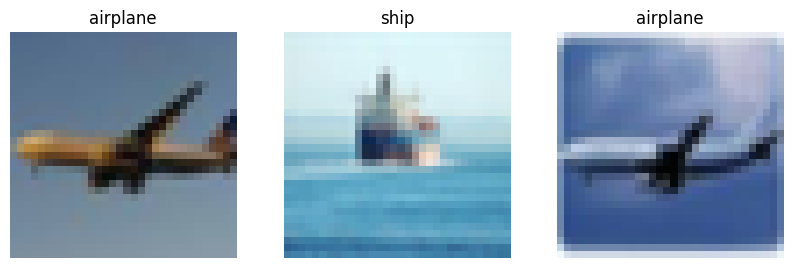

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(3):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
model = VGG16(num_classes=10, upsample_input=7)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(reduction=tf.keras.losses.Reduction.NONE)

In [8]:
epochs = 1
results = train(model=model, train_dataset=train_ds, val_dataset=val_ds,
               optimizer=optimizer, loss_object=loss_object, epochs=epochs)

 18%|██████████████▏                                                                | 504/2813 [12:53<59:04,  1.54s/it]


KeyboardInterrupt: 

In [ ]:
results

In [ ]:
model.save_weights("./vgg16_cifar10.h5")

In [85]:
plot_metrics(results)
plt.savefig("./metrics2.jpg", bbox_inches="tight")

NameError: name 'results' is not defined

In [ ]:
yt, yp = predict(test_ds, model)
plot_confusion_matrix(yt, yp, labels=class_names)